<a href="https://colab.research.google.com/github/kjedrzejczak/Machine_Learning_Bootcamp_practice_II/blob/main/01_k_means_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from numpy.linalg import norm
import pandas as pd
import random
import plotly.express as px
import plotly.graph_objects as go

np.random.seed(42)
np.set_printoptions(precision=6)
random.seed(41)

Wygenerowanie danych

In [2]:
from sklearn.datasets import make_blobs

In [3]:
data = make_blobs(n_samples=40, centers=2, cluster_std=1.0, center_box=(-4.0, 4.0), random_state=42)[0]
df = pd.DataFrame(data, columns=['x1', 'x2'])
df.head()

,x1,x2
0,0.377430,0.069424
1,2.217347,2.327304
2,1.376777,0.603609
3,-1.467097,3.139985
4,-1.605386,5.457993


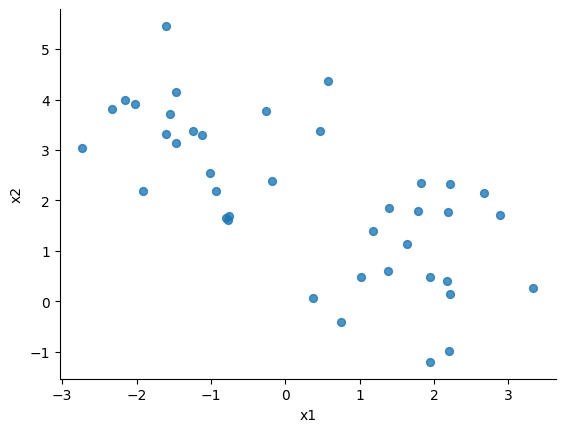

In [4]:
# @title x1 vs x2

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='x1', y='x2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [5]:
fig = px.scatter(df, 'x1', 'x2', width=950, height=580, title='Algorytm K-średnich')
fig.update_traces(marker_size=13)

Implementcja algorytmu K-średnich

In [6]:
# wartości brzegowe

x1_min = df.x1.min()
x1_max = df.x1.max()

x2_min = df.x2.min()
x2_max = df.x2.max()

print(x1_min, x1_max)
print(x2_min, x2_max)

-2.728596881734133 3.333845579232757
-1.1983010410246 5.457992635788267


In [7]:
# losowanie współrzędnych centroidów

centroind_1 = np.array([random.uniform(x1_min, x1_max), random.uniform(x2_min, x2_max)])
centroind_2 = np.array([random.uniform(x1_min, x1_max), random.uniform(x2_min, x2_max)])

print(centroind_1)
print(centroind_2)

[-0.418681  0.337434]
[-1.722009  4.884443]


In [8]:
# wizualizacja punktów startowych centroidów

fig = px.scatter(df, 'x1', 'x2', width=950, height=600, title='Algorytm K-średnich - inicializacja centroidów')
fig.add_trace(go.Scatter(x=[centroind_1[0]], y=[centroind_1[1]], name='centrid 1', mode='markers', marker_line_width=3))
fig.add_trace(go.Scatter(x=[centroind_2[0]], y=[centroind_2[1]], name='centrid 2', mode='markers', marker_line_width=3))
fig.update_traces(marker_size=12, showlegend=False)

In [9]:
# przypisywanie punktów do najbliższymi centroidów
clusters = []
for point in data:
  centroind_1_dust = norm(centroind_1 - point)
  centroind_2_dust = norm(centroind_2 - point)
  cluster = 1
  if centroind_1_dust > centroind_2_dust:
    cluster = 2
  clusters.append(cluster)

df['cluster'] = clusters
df.head()

,x1,x2,cluster
0,0.377430,0.069424,1
1,2.217347,2.327304,1
2,1.376777,0.603609,1
3,-1.467097,3.139985,2
4,-1.605386,5.457993,2


In [10]:
# wizualizacja punktów

fig = px.scatter(df, 'x1', 'x2', width=950, height=600, color='cluster', title='Algorytm K-średnich - iteracja 1 - przypisanie do najbliższego centroidu')
fig.add_trace(go.Scatter(x=[centroind_1[0]], y=[centroind_1[1]], name='centrid 1', mode='markers', marker_line_width=3))
fig.add_trace(go.Scatter(x=[centroind_2[0]], y=[centroind_2[1]], name='centrid 2', mode='markers', marker_line_width=3))
fig.update_traces(marker_size=12, showlegend=False)

In [11]:
# obliczanie nowych współrzędnych centroidów

new_centroid_1 = [df[df.cluster == 1].x1.mean(), df[df.cluster == 1].x2.mean()]
new_centroid_2 = [df[df.cluster == 2].x1.mean(), df[df.cluster == 2].x2.mean()]

print(new_centroid_1, new_centroid_2)

[1.1057883070617118, 1.1784295565923741] [-1.322466347597972, 3.7664746248027723]


In [12]:
# wizualizacja punktów

fig = px.scatter(df, 'x1', 'x2', width=950, height=600, color='cluster', title='Algorytm K-średnich - obliczanie nowych centroidów')
fig.add_trace(go.Scatter(x=[centroind_1[0]], y=[centroind_1[1]], name='centrid 1', mode='markers', marker_line_width=3))
fig.add_trace(go.Scatter(x=[centroind_2[0]], y=[centroind_2[1]], name='centrid 2', mode='markers', marker_line_width=3))
fig.add_trace(go.Scatter(x=[new_centroid_1[0]], y=[new_centroid_1[1]], name='new centrid 1', mode='markers', marker_line_width=3))
fig.add_trace(go.Scatter(x=[new_centroid_2[0]], y=[new_centroid_2[1]], name='new centrid 2', mode='markers', marker_line_width=3))
fig.update_traces(marker_size=12, showlegend=False)

In [13]:
# już tylko nowe centroidy

fig = px.scatter(df, 'x1', 'x2', width=950, height=600, color='cluster', title='Algorytm K-średnich -iteracja 1- inicializacja centroidów')
fig.add_trace(go.Scatter(x=[new_centroid_1[0]], y=[new_centroid_1[1]], name='new centrid 1', mode='markers', marker_line_width=3))
fig.add_trace(go.Scatter(x=[new_centroid_2[0]], y=[new_centroid_2[1]], name='new centrid 2', mode='markers', marker_line_width=3))
fig.update_traces(marker_size=12, showlegend=False)

In [14]:
# przypisywanie punktów do najbliższych centroidów
clusters = []
for point in data:
  centroind_1_dust = norm(new_centroid_1 - point)
  centroind_2_dust = norm(new_centroid_2 - point)
  cluster = 1
  if centroind_1_dust > centroind_2_dust:
    cluster = 2
  clusters.append(cluster)

df['cluster'] = clusters
df.head()

,x1,x2,cluster
0,0.377430,0.069424,1
1,2.217347,2.327304,1
2,1.376777,0.603609,1
3,-1.467097,3.139985,2
4,-1.605386,5.457993,2


In [15]:
# wizualizacja nowych punktów przypisania

fig = px.scatter(df, 'x1', 'x2', width=950, height=600, color='cluster', title='Algorytm K-średnich - iteracja 2 - ponowne przypisanie punktów')
fig.add_trace(go.Scatter(x=[new_centroid_1[0]], y=[new_centroid_1[1]], name='centroid 1', mode='markers', marker_line_width=3))
fig.add_trace(go.Scatter(x=[new_centroid_2[0]], y=[new_centroid_2[1]], name='centroid 2', mode='markers', marker_line_width=3))
fig.update_traces(marker_size=12)
fig.update_layout(showlegend=False)

In [16]:
# obliczanie nowych współrzędnych centroidów

new_2_centroid_1 = [df[df.cluster == 1].x1.mean(), df[df.cluster == 1].x2.mean()]
new_2_centroid_2 = [df[df.cluster == 2].x1.mean(), df[df.cluster == 2].x2.mean()]

print(new_2_centroid_1, new_2_centroid_2)

[1.4180663576886534, 1.0311646927855822] [-1.316444653506243, 3.5090014873277737]


In [17]:
# wizualizacja punktów

fig = px.scatter(df, 'x1', 'x2', width=950, height=600, color='cluster', title='Algorytm K-średnich - iteracja 2  przypisanie punktów')
fig.add_trace(go.Scatter(x=[new_centroid_1[0]], y=[new_centroid_1[1]], name='centrid 1', mode='markers', marker_line_width=3))
fig.add_trace(go.Scatter(x=[new_centroid_2[0]], y=[new_centroid_2[1]], name='centrid 2', mode='markers', marker_line_width=3))
fig.add_trace(go.Scatter(x=[new_2_centroid_1[0]], y=[new_2_centroid_1[1]], name='new centrid 1', mode='markers', marker_line_width=3))
fig.add_trace(go.Scatter(x=[new_2_centroid_2[0]], y=[new_2_centroid_2[1]], name='new centrid 2', mode='markers', marker_line_width=3))
fig.update_traces(marker_size=12)
fig.update_traces(marker_size=12, showlegend=False)

In [18]:
# aktualizacja centroidów

new_2_centroid_1 = [df[df.cluster == 1].x1.mean(), df[df.cluster == 1].x2.mean()]
new_2_centroid_2 = [df[df.cluster == 2].x1.mean(), df[df.cluster == 2].x2.mean()]

print(new_2_centroid_1, new_2_centroid_2)

[1.4180663576886534, 1.0311646927855822] [-1.316444653506243, 3.5090014873277737]


In [19]:
# przypisywanie punktów do najbliższych centroidów
clusters = []
for point in data:
  centroind_1_dust = norm(new_centroid_1 - point)
  centroind_2_dust = norm(new_centroid_2 - point)
  cluster = 1
  if centroind_1_dust > centroind_2_dust:
    cluster = 2
  clusters.append(cluster)

df['cluster'] = clusters
df.head()

,x1,x2,cluster
0,0.377430,0.069424,1
1,2.217347,2.327304,1
2,1.376777,0.603609,1
3,-1.467097,3.139985,2
4,-1.605386,5.457993,2


In [20]:
# wizualizacja punktów

fig = px.scatter(df, 'x1', 'x2', width=950, height=600, color='cluster', title='Algorytm K-średnich - aktualizacja centroidów')
fig.add_trace(go.Scatter(x=[new_2_centroid_1[0]], y=[new_2_centroid_1[1]], name='new centrid 1', mode='markers', marker_line_width=3))
fig.add_trace(go.Scatter(x=[new_2_centroid_2[0]], y=[new_2_centroid_2[1]], name='new centrid 2', mode='markers', marker_line_width=3))
fig.update_traces(marker_size=12)
fig.update_traces(marker_size=12, showlegend=False)

Podsumowanie

In [21]:
data = make_blobs(n_samples=40, centers=2, cluster_std=1.0, center_box=(-4.0, 4.0), random_state=42)[0]
df = pd.DataFrame(data, columns=['x1', 'x2'])
df.head()

x1_min = df.x1.min()
x1_max = df.x1.max()

x2_min = df.x2.min()
x2_max = df.x2.max()

centroid_1 = np.array([random.uniform(x1_min, x1_max), random.uniform(x2_min, x2_max)])
centroid_2 = np.array([random.uniform(x1_min, x1_max), random.uniform(x2_min, x2_max)])

for i in range(10):
  clusters = []
  for point in data:
    centroid_1_dust = norm(centroid_1 - point)
    centroid_2_dust = norm(centroid_2 - point)
    cluster = 1
    if centroid_1_dust > centroid_2_dust:
      cluster = 2
    clusters.append(cluster)

  df['cluster'] = clusters

  centroid_1 = [df[df.cluster == 1].x1.mean(), df[df.cluster == 1].x2.mean()]
  centroid_2 = [df[df.cluster == 2].x1.mean(), df[df.cluster == 2].x2.mean()]


print(centroid_1, centroid_2)

[-1.184810430866379, 3.18988309513586] [1.8482624297593075, 0.8622246431993411]


In [22]:

fig = px.scatter(df, 'x1', 'x2', width=950, height=600, color='cluster', title='Algorytm K-średnich - aktualizacja centroidów')
fig.add_trace(go.Scatter(x=[centroid_1[0]], y=[centroid_1[1]], name='new centrid 1 - 10 fold', mode='markers', marker_line_width=3))
fig.add_trace(go.Scatter(x=[centroid_2[0]], y=[centroid_2[1]], name='new centrid 2-  10 fold', mode='markers', marker_line_width=3))
fig.update_traces(marker_size=12)
fig.update_traces(marker_size=12, showlegend=False)